In [15]:
# import Libraries
import pandas as pd
import numpy as np
import pymysql
from sqlalchemy import create_engine

# CLEANING ALL THREE DATASETS

## CLIENT PROFILE DATASET

In [16]:
file_path = "/Users/smitaprakas/Desktop/ironhack_262/projects/quest_beautiful_soup_group2/format_txt/df_final_demo.txt"
df_demo = pd.read_csv(file_path, delimiter=',')

df_demo_test = df_demo

df_demo.dropna(how='any', inplace=True)
df_demo.isna().sum()

df_demo.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


## EXPERIMENT DATASET PER CLIENT_ID

In [17]:
# step 1 : clean data experiment 
df_experiment= pd.read_csv("/Users/smitaprakas/Desktop/ironhack_262/projects/quest_beautiful_soup_group2/format_txt/df_final_experiment_clients.txt")
df_experiment.head()

# Clean column 
df_experiment.columns = df_experiment.columns.str.lower()
df_experiment.columns = df_experiment.columns.map(lambda word: word.strip().replace(" ","_") )

# 2 Clean empty rows 
# Count the number of null values in each column

df_experiment.dropna(inplace=True)

#Display data 
display(df_experiment)

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


## PROCESS STEP PER CLIENT_ID

In [18]:
# Load the data from the first file
file1 = 'df_final_web_data_pt_1.csv'
web_data_1 = pd.read_csv(file1, delimiter=';')

# Load the data from the second file
file2 = 'df_final_web_data_pt_2.csv'
web_data_2 = pd.read_csv(file2, delimiter=';')

# Merge the DataFrames
merged_web_data = pd.concat([web_data_1, web_data_2], ignore_index=True)


merged_web_data.shape

# Save the merged file to a new csv file
merged_file = 'merged_web_data.csv'
merged_web_data.to_csv(merged_file, index=False)
print(f"Merged data saved to {merged_file}")

display(merged_web_data)

Merged data saved to merged_web_data.csv


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [19]:
# number of unique client_ids
unique_clients = merged_web_data.nunique()
unique_clients

client_id       120157
visitor_id      130236
visit_id        158095
process_step         5
date_time       629363
dtype: int64

In [20]:
# value_counts per client_id
client_id_counts = merged_web_data['client_id'].value_counts()
client_id_counts.head()

client_id
5574879    111
2274658     90
2128341     84
5951379     81
1595223     81
Name: count, dtype: int64

In [21]:
# check the duplicated rows = 10 764 rows 

merged_web_data.duplicated().sum()

10764

In [22]:
# drop the duplicated rows = 10 764 rows 

merged_web_data.drop_duplicates(inplace=True)

In [23]:
# filter the DataFrame for the specific client_id
client_data = merged_web_data[merged_web_data['client_id'] == 2128341]
client_data

,client_id,visitor_id,visit_id,process_step,date_time
333866,2128341,585028710_71643026491,206225469_90859667128_113497,start,2017-04-02 10:50:08
333867,2128341,585028710_71643026491,206225469_90859667128_113497,start,2017-04-02 10:50:06
333868,2128341,486034465_74844774049,821194309_33974167145_311653,start,2017-04-02 10:45:46
333869,2128341,486034465_74844774049,821194309_33974167145_311653,start,2017-04-02 10:45:41
333870,2128341,486034465_74844774049,440265138_22787625182_840683,start,2017-04-02 12:31:42
...,...,...,...,...,...
333959,2128341,923252049_38877790223,870214894_60784041185_600579,start,2017-03-30 15:50:36
333960,2128341,368926294_90402015035,388533651_44737161264_462550,start,2017-03-30 15:48:00
333961,2128341,368926294_90402015035,388533651_44737161264_462550,start,2017-03-30 15:47:19
333962,2128341,585028710_71643026491,690501382_19217870082_30385,start,2017-04-01 13:10:12


In [24]:
# check for missing values = no missing value

merged_web_data.isnull().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [25]:
merged_web_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 744641 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     744641 non-null  int64 
 1   visitor_id    744641 non-null  object
 2   visit_id      744641 non-null  object
 3   process_step  744641 non-null  object
 4   date_time     744641 non-null  object
dtypes: int64(1), object(4)
memory usage: 34.1+ MB


In [26]:
# convert the dtype of 'date_time' column to datetime64

merged_web_data['date_time'] = pd.to_datetime(merged_web_data['date_time'])

# check the data types after conversion

print(merged_web_data.dtypes)

client_id                int64
visitor_id              object
visit_id                object
process_step            object
date_time       datetime64[ns]
dtype: object


# CLIENTS DEMOGRAPHICS

In [61]:
# value_counts() for 'gender' column : 
df_demo['gendr'].value_counts()

gendr
U    24122
M    23724
F    22745
X        3
Name: count, dtype: int64

In [62]:
# average age of the clients : 
df_demo['clnt_age'].mean()

46.442240133722414

In [63]:
# average tenure in months : 
df_demo['clnt_tenure_mnth'].mean()

150.6599994333796

In [30]:
#Montant moyen en compte en banque : 
df_demo['bal'].mean()

147446.72652817518

In [31]:
# value_counts() for 'variation' column:
frequency_experiment = df_experiment['variation'].value_counts()
frequency_experiment 


variation
Test       26968
Control    23532
Name: count, dtype: int64

In [32]:
# merge the DataFrames horizontally using 'client_id' as the common key
merged_df = pd.merge(df_demo, df_experiment, on='client_id', how='outer')
merged_df = pd.merge(merged_df, merged_web_data, on='client_id', how='outer')
merged_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744636,9668240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
744637,9668240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
744638,9668240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
744639,9668240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [64]:
# checking for null values in each column of the merged_df : 

merged_df.isnull().sum()

client_id                0
clnt_tenure_yr      300869
clnt_tenure_mnth    300869
clnt_age            300869
gendr               300869
num_accts           300869
bal                 300869
calls_6_mnth        300869
logons_6_mnth       300869
variation           427406
visitor_id               0
visit_id                 0
process_step             0
date_time                0
dtype: int64

In [34]:
merged_df.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24


# CONNECTING PYTHON TO SQL 

In [35]:
import pandas as pd
from sqlalchemy import create_engine, text
import pymysql.cursors
import os
import urllib

In [36]:
urllib.parse.quote_plus('!')

'%21'

In [37]:
pw_raw = 'SQL2024!'
pw = urllib.parse.quote_plus(pw_raw)

In [38]:
connection_string = 'mysql+pymysql://root:' + pw + '@localhost:3306/'
engine = create_engine(connection_string)

In [39]:
#with engine.connect() as connection:
    #connection.execute(f'create database if not exists vanguard_ab_test')

In [40]:
#df_demo.to_sql('client_profile', engine, 'vanguard_ab_test', if_exists='replace', index=False)


In [41]:
#merged_web_data.to_sql('web_data', engine, 'vanguard_ab_test', if_exists='replace', index=False)

In [42]:

#df_experiment.to_sql('experiment', engine, 'vanguard_ab_test', if_exists='replace', index=False)


In [44]:
with engine.connect() as connection:

    txt = '''select client_id, count(process_step) as total_steps
    from vanguard_ab_test.all_merged
    group by client_id
    order by total_steps desc;'''
    query = text(txt)
    result = connection.execute(query)
    step_by_client = (pd.DataFrame(result.all()))

In [45]:
step_by_client.total_steps

0        72
1        71
2        61
3        61
4        60
         ..
50482     1
50483     1
50484     1
50485     1
50486     1
Name: total_steps, Length: 50487, dtype: int64

In [46]:
with engine.connect() as connection:

    txt = '''select client_id, count(process_step='confirm') as total_confirms
    from vanguard_ab_test.all_merged
    group by client_id
    order by total_confirms desc;'''
    query = text(txt)
    result = connection.execute(query)
    confirm_by_client = (pd.DataFrame(result.all()))

In [47]:
confirm_by_client.total_confirms

0        72
1        71
2        61
3        61
4        60
         ..
50482     1
50483     1
50484     1
50485     1
50486     1
Name: total_confirms, Length: 50487, dtype: int64

In [48]:
with engine.connect() as connection:

    txt = '''select *
    from vanguard_ab_test.all_merged;'''
    query = text(txt)
    result = connection.execute(query)
    all_merged = (pd.DataFrame(result.all()))

In [49]:
all_merged.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation,visitor_id,visit_id,process_step,date_time
0,8320017,22.0,274.0,34.5,M,2.0,36001.9,5.0,8.0,Test,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05
1,8320017,22.0,274.0,34.5,M,2.0,36001.9,5.0,8.0,Test,39393514_33118319366,960651974_70596002104_312201,step_3,2017-04-05 13:09:43
2,8320017,22.0,274.0,34.5,M,2.0,36001.9,5.0,8.0,Test,39393514_33118319366,960651974_70596002104_312201,step_2,2017-04-05 13:08:40
3,8320017,22.0,274.0,34.5,M,2.0,36001.9,5.0,8.0,Test,39393514_33118319366,960651974_70596002104_312201,step_1,2017-04-05 13:08:24
4,8320017,22.0,274.0,34.5,M,2.0,36001.9,5.0,8.0,Test,39393514_33118319366,960651974_70596002104_312201,start,2017-04-05 13:08:06


In [50]:
# Convertir la colonne 'date_time' en format de date/heure si elle n'est pas déjà convertie
all_merged['date_time'] = pd.to_datetime(all_merged['date_time'])

# Trier le DataFrame par 'client_id' et 'date_time'
all_merged = all_merged.sort_values(by=['client_id', 'date_time'])

# Calculer la différence de temps entre chaque étape pour chaque client
all_merged['next_step_time'] = all_merged.groupby('client_id')['date_time'].shift(-1)
all_merged['duration_seconds'] = (all_merged['next_step_time'] - all_merged['date_time']).dt.total_seconds()

# Calculer la durée moyenne pour chaque étape, en regroupant par 'variation' et 'process_step'
result = all_merged.groupby(['variation', 'process_step'])['duration_seconds'].mean().reset_index()
result['average_duration_minutes'] = result['duration_seconds'] / 60
result['average_duration_hours'] = result['duration_seconds'] / 3600

result


,variation,process_step,duration_seconds,average_duration_minutes,average_duration_hours
0,Control,confirm,333580.458151,5559.674303,92.661238
1,Control,start,129895.433093,2164.923885,36.082065
2,Control,step_1,57872.297814,964.538297,16.075638
3,Control,step_2,34645.069197,577.417820,9.623630
4,Control,step_3,60698.987631,1011.649794,16.860830
5,Test,confirm,356541.199328,5942.353322,99.039222
6,Test,start,101116.003966,1685.266733,28.087779
7,Test,step_1,43054.904265,717.581738,11.959696
8,Test,step_2,21266.629605,354.443827,5.907397
9,Test,step_3,33122.500283,552.041671,9.200695


## KPI : COMPLETION RATE

***completion rate = (number of users having reached step 'confirm' / total users) * 100***

### Completion rate per visitor_id :

In [51]:
# Total number of unique visitors
total_unique_visitors = all_merged['visitor_id'].nunique()

# Number of unique visitors in the control group
control_visitors = all_merged[all_merged['variation'] == 'Control']['visitor_id'].nunique()

# Number of unique visitors in the test group
test_visitors = all_merged[all_merged['variation'] == 'Test']['visitor_id'].nunique()

# Number of unique visitors in the control group reaching the 'confirm' step
control_confirm_visitors = all_merged[(all_merged['variation'] == 'Control') & (all_merged['process_step'] == 'confirm')]['visitor_id'].nunique()

# Number of unique visitors in the test group reaching the 'confirm' step
test_confirm_visitors = all_merged[(all_merged['variation'] == 'Test') & (all_merged['process_step'] == 'confirm')]['visitor_id'].nunique()

print("Total number of unique visitors:", total_unique_visitors)
print("Number of unique visitors in the control group:", control_visitors)
print("Number of unique visitors in the test group:", test_visitors)
print('\n')
print("Number of unique visitors in the control group reaching the 'confirm' step:", control_confirm_visitors)
print("Number of unique visitors in the test group reaching the 'confirm' step:", test_confirm_visitors)
print('\n')


# Calculate completion rate for the test group
test_completion_rate = round((test_confirm_visitors / test_visitors) * 100, 2)

# Calculate completion rate for the control group
control_completion_rate = round((control_confirm_visitors / control_visitors) * 100, 2)

print("Completion Rate (Test):", test_completion_rate, "%")
print("Completion Rate (Control):", control_completion_rate, "%")

Total number of unique visitors: 55994
Number of unique visitors in the control group: 26271
Number of unique visitors in the test group: 29908


Number of unique visitors in the control group reaching the 'confirm' step: 15560
Number of unique visitors in the test group reaching the 'confirm' step: 19499


Completion Rate (Test): 65.2 %
Completion Rate (Control): 59.23 %


### Completion rate per visit_id :

In [52]:
# Total number of unique visits
total_unique_visits = all_merged['visit_id'].nunique()

# Number of unique visits in the control group
control_visits = all_merged[all_merged['variation'] == 'Control']['visit_id'].nunique()

# Number of unique visits in the test group
test_visits = all_merged[all_merged['variation'] == 'Test']['visit_id'].nunique()

# Number of unique visits in the control group reaching the 'confirm' step
control_confirm_visits = all_merged[(all_merged['variation'] == 'Control') & (all_merged['process_step'] == 'confirm')]['visit_id'].nunique()

# Number of unique visits in the test group reaching the 'confirm' step
test_confirm_visits = all_merged[(all_merged['variation'] == 'Test') & (all_merged['process_step'] == 'confirm')]['visit_id'].nunique()

print("Total number of unique visits:", total_unique_visits)
print("Number of unique visits in the control group:", control_visits)
print("Number of unique visits in the test group:", test_visits)
print('\n')
print("Number of unique visits in the control group reaching the 'confirm' step:", control_confirm_visits)
print("Number of unique visits in the test group reaching the 'confirm' step:", test_confirm_visits)
print('\n')

# Calculate completion rate for the test group based on visit_id
test_completion_rate_visit_id = round((test_confirm_visits / test_visits) * 100, 2)

# Calculate completion rate for the control group based on visit_id
control_completion_rate_visit_id = round((control_confirm_visits / control_visits) * 100, 2)

print("Completion Rate (Test) based on visit_id:", test_completion_rate_visit_id, "%")
print("Completion Rate (Control) based on visit_id:", control_completion_rate_visit_id, "%")


Total number of unique visits: 69183
Number of unique visits in the control group: 32181
Number of unique visits in the test group: 37122


Number of unique visits in the control group reaching the 'confirm' step: 16039
Number of unique visits in the test group reaching the 'confirm' step: 21725


Completion Rate (Test) based on visit_id: 58.52 %
Completion Rate (Control) based on visit_id: 49.84 %


### Completion rate per client_id :

In [53]:
# Total number of unique clients
total_unique_clients = all_merged['client_id'].nunique()

# Number of unique clients in the control group
control_clients = all_merged[all_merged['variation'] == 'Control']['client_id'].nunique()

# Number of unique clients in the test group
test_clients = all_merged[all_merged['variation'] == 'Test']['client_id'].nunique()

# Number of unique clients in the control group reaching the 'confirm' step
control_confirm_clients = all_merged[(all_merged['variation'] == 'Control') & (all_merged['process_step'] == 'confirm')]['client_id'].nunique()

# Number of unique clients in the test group reaching the 'confirm' step
test_confirm_clients = all_merged[(all_merged['variation'] == 'Test') & (all_merged['process_step'] == 'confirm')]['client_id'].nunique()

print("Total number of unique clients:", total_unique_clients)
print("Number of unique clients in the control group:", control_clients)
print("Number of unique clients in the test group:", test_clients)
print('\n')
print("Number of unique clients in the control group reaching the 'confirm' step:", control_confirm_clients)
print("Number of unique clients in the test group reaching the 'confirm' step:", test_confirm_clients)
print('\n')

# Calculate completion rate for the test group based on client_id
test_completion_rate_client_id = round((test_confirm_clients / test_clients) * 100, 2)

# Calculate completion rate for the control group based on client_id
control_completion_rate_client_id = round((control_confirm_clients / control_clients) * 100, 2)

print("Completion Rate (Test) based on client_id:", test_completion_rate_client_id, "%")
print("Completion Rate (Control) based on client_id:", control_completion_rate_client_id, "%")


Total number of unique clients: 50487
Number of unique clients in the control group: 23526
Number of unique clients in the test group: 26961


Number of unique clients in the control group reaching the 'confirm' step: 15428
Number of unique clients in the test group reaching the 'confirm' step: 18682


Completion Rate (Test) based on client_id: 69.29 %
Completion Rate (Control) based on client_id: 65.58 %


### EDA : Comparing results of each group with visualization :

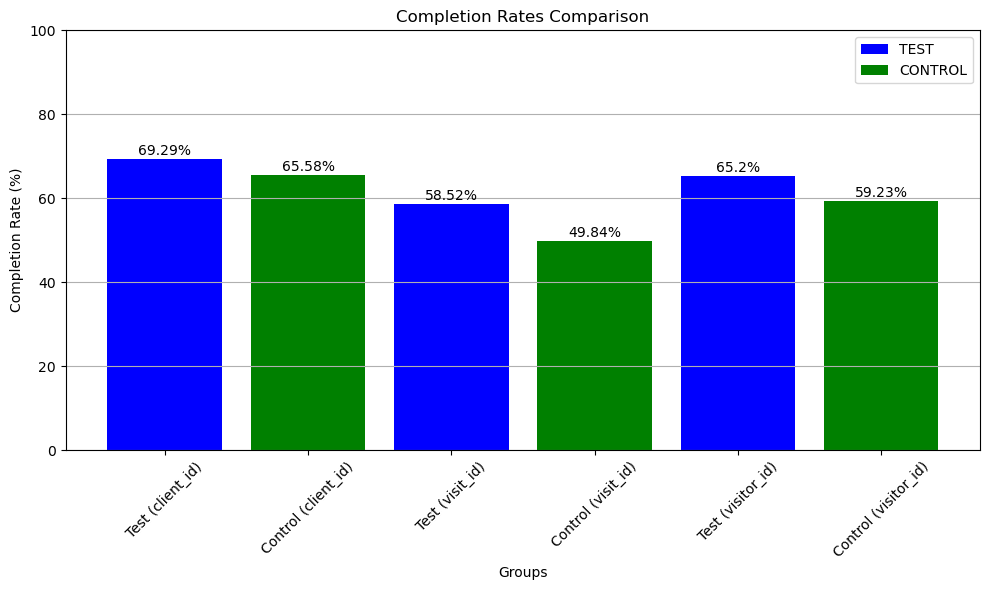

In [54]:
import matplotlib.pyplot as plt

# Completion rates data
labels = ['Test (client_id)', 'Control (client_id)', 'Test (visit_id)', 'Control (visit_id)', 'Test (visitor_id)', 'Control (visitor_id)']
completion_rates = [69.29, 65.58, 58.52, 49.84, 65.2, 59.23]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, completion_rates, color=['blue', 'green', 'blue', 'green', 'blue', 'green'])

# Add legend
plt.legend(handles=[bars[0], bars[1]], labels=['TEST', 'CONTROL'])

plt.title('Completion Rates Comparison')
plt.xlabel('Groups')
plt.ylabel('Completion Rate (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding data labels
for i in range(len(labels)):
    plt.text(i, completion_rates[i] + 1, f'{completion_rates[i]}%', ha='center')

plt.tight_layout()
plt.show()

In [55]:
# Calculate total counts of each step for the 'Test' group
test_total_counts = all_merged[all_merged['variation'] == 'Test']['process_step'].value_counts()

# Calculate the total number of steps
total_steps = test_total_counts.sum()

In [56]:
# Create DataFrame from test_total_counts Series
test_counts_df = pd.DataFrame({'count': test_total_counts})

# Calculate the total number of steps
total_steps = test_counts_df['count'].sum()

# Calculate the proportion of each step compared to the total steps
test_counts_df['proportion'] = test_counts_df['count'] / total_steps * 100

print(test_counts_df)


              count  proportion
process_step                   
start         55753   31.562887
step_1        38651   21.881103
step_2        30888   17.486314
step_3        25755   14.580420
confirm       25594   14.489275


In [57]:
# Calculate total counts of each step for the 'Test' group
control_total_counts = all_merged[all_merged['variation'] == 'Control']['process_step'].value_counts()

# Calculate the total number of steps
total_steps = control_total_counts.sum()

In [58]:
# Create DataFrame from test_total_counts Series
control_counts_df = pd.DataFrame({'count': control_total_counts})

# Calculate the total number of steps
total_steps = control_counts_df['count'].sum()

# Calculate the proportion of each step compared to the total steps
control_counts_df['proportion'] = control_counts_df['count'] / total_steps * 100

print(control_counts_df)

              count  proportion
process_step                   
start         45361   32.289546
step_1        29533   21.022622
step_2        25764   18.339716
step_3        22495   16.012728
confirm       17329   12.335388


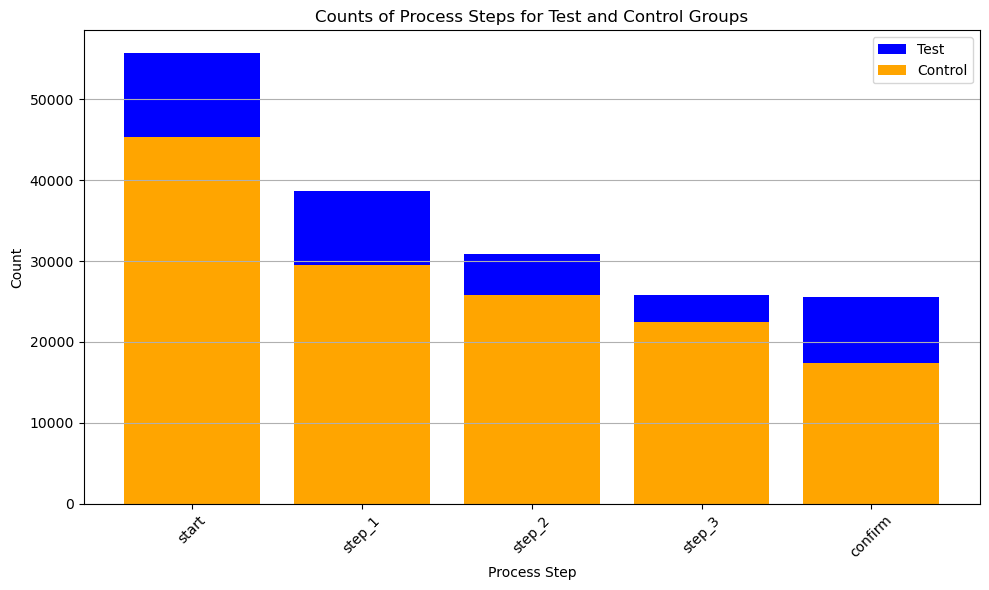

In [59]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Plot for Test group
plt.bar(test_counts_df.index, test_counts_df['count'], color='blue', label='Test')

# Plot for Control group
plt.bar(control_counts_df.index, control_counts_df['count'], color='orange', label='Control')

plt.title('Counts of Process Steps for Test and Control Groups')
plt.xlabel('Process Step')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Filter the data for the 'Test' variation
test_data = all_merged[all_merged['variation'] == 'Test']

# Calculate the number of visitor_ids per step for the 'Test' variation
test_visitor_id_counts = test_data.groupby('process_step')['visitor_id'].nunique()

# Calculate the total number of visitor_ids for the 'Test' variation
total_test_visitor_id = test_data['visitor_id'].nunique()

# Calculate the proportion of each step relative to the total number of visitor_ids for the 'Test' variation
test_visitor_id_proportion = test_visitor_id_counts / total_test_visitor_id * 100

# Create a DataFrame to store the results for the 'Test' variation
test_visitor_id_stats = pd.DataFrame({
    'visitor_id_count': test_visitor_id_counts,
    'proportion_on_total': test_visitor_id_proportion
})

print("Variation 'Test' Visitor ID Stats:")
display(test_visitor_id_stats)


# Filter the data for the 'Control' variation
control_data = all_merged[all_merged['variation'] == 'Control']

# Calculate the number of visitor_ids per step for the 'Control' variation
control_visitor_id_counts = control_data.groupby('process_step')['visitor_id'].nunique()

# Calculate the total number of visitor_ids for the 'Control' variation
total_control_visitor_id = control_data['visitor_id'].nunique()

# Calculate the proportion of each step relative to the total number of visitor_ids for the 'Control' variation
control_visitor_id_proportion = control_visitor_id_counts / total_control_visitor_id * 100

# Create a DataFrame to store the results for the 'Control' variation
control_visitor_id_stats = pd.DataFrame({
    'visitor_id_count': control_visitor_id_counts,
    'proportion_on_total': control_visitor_id_proportion
})

print("Variation 'Control' Visitor ID Stats:")
display(control_visitor_id_stats)


Variation 'Test' Visitor ID Stats:


,visitor_id_count,proportion_on_total
process_step,,
confirm,19499,65.196603
start,28726,96.047880
step_1,25544,85.408586
step_2,22969,76.798850
step_3,21264,71.098034


Variation 'Control' Visitor ID Stats:


,visitor_id_count,proportion_on_total
process_step,,
confirm,15560,59.228807
start,25902,98.595409
step_1,21228,80.803928
step_2,19159,72.928324
step_3,17693,67.348026


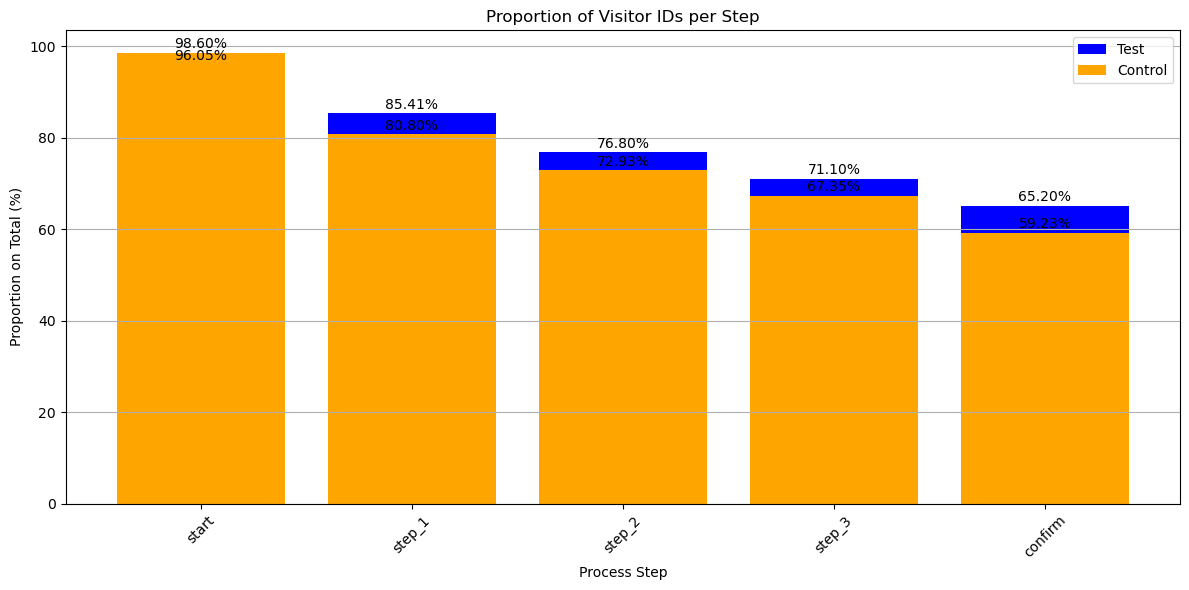

In [ ]:
# Define the desired order of process steps
desired_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Reindex the DataFrame with the desired order
test_visitor_id_stats = test_visitor_id_stats.reindex(desired_order)
control_visitor_id_stats = control_visitor_id_stats.reindex(desired_order)

# Plotting
plt.figure(figsize=(12, 6))

# Plot for 'Test' variation
plt.bar(test_visitor_id_stats.index, test_visitor_id_stats['proportion_on_total'], color='blue', label='Test')

# Plot for 'Control' variation
plt.bar(control_visitor_id_stats.index, control_visitor_id_stats['proportion_on_total'], color='orange', label='Control')

plt.title('Proportion of Visitor IDs per Step')
plt.xlabel('Process Step')
plt.ylabel('Proportion on Total (%)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding data labels
for i in range(len(test_visitor_id_stats)):
    plt.text(i, test_visitor_id_stats['proportion_on_total'][i] + 1, f'{test_visitor_id_stats["proportion_on_total"][i]:.2f}%', ha='center')
for i in range(len(control_visitor_id_stats)):
    plt.text(i, control_visitor_id_stats['proportion_on_total'][i] + 1, f'{control_visitor_id_stats["proportion_on_total"][i]:.2f}%', ha='center')

plt.tight_layout()
plt.show()

# HYPOTHESIS TESTING

In [ ]:
# Completion rate per visitor_id :

import numpy as np
import statsmodels.api as sm

# Number of successes (completed visits) and total observations (total visits) for Test and Control groups
test_confirm_visitors    # Number of completed visits in the Test group
test_visitors      # Total number of visits in the Test group

control_confirm_visitors  # Number of completed visits in the Control group
control_visitors   # Total number of visits in the Control group

# Perform two-sample proportion z-test
z_stat, p_value = sm.stats.proportions_ztest([test_confirm_visitors, control_confirm_visitors], [test_visitors, control_visitors])

# Significance level (alpha)
alpha = 0.05

# Print results
print("Z-Statistic:", z_stat)
print("P-Value:", p_value)

# Interpret results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the completion rates.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the completion rates.")


Z-Statistic: 14.570894135053871
P-Value: 4.30222925338892e-48
Reject the null hypothesis. There is a significant difference between the completion rates.



The z-statistic measures the number of standard deviations a data point is from the mean of a normal distribution. In this case, a z-statistic of 14.57 indicates that the difference between the completion rates of the Test and Control groups is quite significant.

The p-value represents the probability of observing a test statistic (or one more extreme) under the null hypothesis. A very small p-value, such as 4.30e-48, suggests strong evidence against the null hypothesis. In other words, there is a very low probability of observing such a large difference in completion rates between the Test and Control groups if the true completion rates were equal.

Therefore, with a very low p-value, typically below the significance level (e.g., 0.05), we reject the null hypothesis. This indicates that there is a significant difference between the completion rates of the Test and Control groups.

In [ ]:
# z-test

import numpy as np
import scipy.stats as stats

# Completion rates (assuming they are proportions)
test_completion_rate = 0.693
control_completion_rate = 0.656*1.05

# Observed difference in completion rates
observed_difference = test_completion_rate - control_completion_rate

# Breakeven threshold (5% increase)
breakeven_threshold = 0.05

# Sample sizes (assuming equal sizes for simplicity)
n_test = n_control = 20000

# Calculate pooled standard error
p_pool = (test_completion_rate * n_test + control_completion_rate * n_control) / (n_test + n_control)
se_pooled = np.sqrt(p_pool * (1 - p_pool) * (1 / n_test + 1 / n_control))

# Calculate z-statistic
z_statistic = observed_difference / se_pooled

# Calculate p-value
p_value = 1 - stats.norm.cdf(z_statistic)

# Print results
print("Observed Difference in Completion Rates:", observed_difference)
print("Z-Statistic:", z_statistic)
print("P-Value:", p_value)

# Interpret the results
if p_value < 0.05 and observed_difference > breakeven_threshold:
    print("The observed difference in completion rates is statistically significant and meets the breakeven threshold.")
else:
    print("The observed difference in completion rates is not statistically significant or does not meet the breakeven threshold.")


Observed Difference in Completion Rates: 0.0041999999999998705
Z-Statistic: 0.9088499580874766
P-Value: 0.18171466586307972
The observed difference in completion rates is not statistically significant or does not meet the breakeven threshold.


In [ ]:
# from statsmodels.stats.proportion import proportions_ztest

# df = client_stats_ab
# confirmed_c = df[df['Variation'] == 'Control']['is_confirmed'].sum()
# confirmed_t = df[df['Variation'] == 'Test']['is_confirmed'].sum()
# nobs_c = df[df['Variation'] == 'Control']['is_confirmed'].count()
# nobs_t = df[df['Variation'] == 'Test']['is_confirmed'].count()


# print('Control and Test Means', df[df['Variation'] == 'Control']['is_confirmed'].mean(), df[df['Variation'] == 'Test']['is_confirmed'].mean())
# print()

# # our our control and test group proportions statistically significally different
# print('## Is the difference in the confirmation rates statistically significant? ##')

# result = proportions_ztest([confirmed_c, confirmed_t], [nobs_c, nobs_t], alternative='two-sided')

# print('P-Value for proportial z-test between control and test group: ', result[1])
# print('- We reject the null hypothesis (confirmation rates are the same)')
# print('- and have high confidence the difference in completion rates between the groups are significantly different')
# print()

# p_hat = df[df['Variation'] == 'Test']['is_confirmed'].mean()
# p_0 = df[df['Variation'] == 'Control']['is_confirmed'].mean() * 1.05
# p_0b = df[df['Variation'] == 'Control']['is_confirmed'].mean() 

# print('## Are we confident the test group has a completion rate 5% better than the control? ##')

# result = proportions_ztest(confirmed_t, nobs_t, value=p_0, alternative='larger')

# print('P-Value for greater proportial z-test vs control mean * 1.05: ', result[1])
# print('- We can not reject the null hypothesis (test confirmation rate is 5% higher)')
# print('- not confident we will see a 5% lift should we implement the changes')

In [ ]:
# Calculate average age for clients engaged in the new process
new_process_avg_age = all_merged[all_merged['variation'] == 'Test']['clnt_age'].mean()

# Calculate average age for clients engaged in the old process
old_process_avg_age = all_merged[all_merged['variation'] == 'Control']['clnt_age'].mean()

print("Average age of clients in the new process:", new_process_avg_age)
print("Average age of clients in the old process:", old_process_avg_age)

Average age of clients in the new process: 48.72221624651129
Average age of clients in the old process: 48.284477726683846


In [ ]:
# Let's verify if the average age of clients engaging in the new process is the same as that of those engaging in the old process :

from scipy import stats

# Filter data for the variation
new_process_data = all_merged[all_merged['variation'] == 'Test']
old_process_data = all_merged[all_merged['variation'] == 'Control']

# Perform t-test for the mean ages of clients in the new and old processes
t_statistic, p_value = stats.ttest_ind(new_process_data['clnt_age'], old_process_data['clnt_age'])

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Compare the p-value to a significance level (e.g., 0.05) to determine if the difference in means is statistically significant
if p_value < 0.05:
    print("The difference in mean ages is statistically significant.")
else:
    print("There is no statistically significant difference in mean ages.")


T-Statistic: 7.831721878378589
P-Value: 4.827086764052195e-15
The difference in mean ages is statistically significant.



The p-value of 4.827086764052195e-15 is an extremely small number, indicating a very low probability of observing the data if the null hypothesis were true. In hypothesis testing, the null hypothesis typically assumes no effect or no difference between groups.

In this case, the null hypothesis is that the average ages of clients in the new process and the old process are the same. The small p-value suggests strong evidence against this null hypothesis. Specifically, a p-value close to zero indicates that the observed difference in average ages between the two groups is highly unlikely to occur if the null hypothesis were true.

Therefore, with such a small p-value, we would typically reject the null hypothesis and conclude that there is a statistically significant difference in the average ages of clients between the new process and the old process. In other words, there is evidence to suggest that the average ages of clients engaging in the new process are different from those engaging in the old process.

In [ ]:
# Filter data for clients engaging in Process A (new process)
new_process_tenure = all_merged[all_merged['variation'] == 'Test']['clnt_tenure_yr']

# Calculate average tenure for variation 'Test' (new process)
average_tenure_new_process = new_process_tenure.mean()

# Filter data for clients engaging in variation 'Control' (old process)
old_process_tenure = all_merged[all_merged['variation'] == 'Control']['clnt_tenure_yr']

# Calculate average tenure for Process B
average_tenure_old_process = old_process_tenure.mean()

print("Average tenure for clients engaging in the new process:", average_tenure_new_process)
print("Average tenure for clients engaging in the old process:", average_tenure_old_process)


Average tenure for clients engaging in the new process: 12.182024558284883
Average tenure for clients engaging in the old process: 12.16779373869962


In [ ]:
from scipy.stats import ttest_ind

# Formulate the hypothesis : 

#H0: The average tenure of clients engaging in the new process is equal to the average tenure of clients engaging in the old process.
#H1: The average tenure of clients engaging in the new process is not equal to the average tenure of clients engaging in the old process.

# Significance level: 5%

# Obtain tenure data for clients in the new process and old process
new_process_tenure = new_process_data['clnt_tenure_yr']
old_process_tenure = old_process_data['clnt_tenure_yr']

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(new_process_tenure, old_process_tenure)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 0.5720839232242102
P-Value: 0.5672655256898247


Given the p-value of 0.567, and assuming a significance level of 0.05 (or 5%), we can interpret the result as follows:

Since the p-value (0.567) is greater than the chosen significance level (0.05), we fail to reject the null hypothesis. Therefore, we do not have sufficient evidence to conclude that there is a statistically significant difference in the average tenure between clients engaging in the new process and those engaging in the old process.

In other words, based on the provided data and the chosen significance level, there is no significant difference in the average tenure of clients between the new and old processes.

In [ ]:
# Filter data for clients engaging in the new process
new_process_data = all_merged[all_merged['variation'] == 'Test']

# Calculate gender proportion for new process
new_process_gender_proportion = new_process_data['gendr'].value_counts(normalize=True)

# Filter data for clients engaging in the old process
old_process_data = all_merged[all_merged['variation'] == 'Control']

# Calculate gender proportion for old process
old_process_gender_proportion = old_process_data['gendr'].value_counts(normalize=True)

print("Gender Proportion for New Process:")
print(new_process_gender_proportion)
print()

print("Gender Proportion for Old Process:")
print(old_process_gender_proportion)


Gender Proportion for New Process:
gendr
M    0.335641
U    0.335007
F    0.329306
X    0.000045
Name: proportion, dtype: float64

Gender Proportion for Old Process:
gendr
U    0.344799
M    0.337517
F    0.317685
Name: proportion, dtype: float64


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table with gender and process engagement
contingency_table = pd.crosstab(all_merged['gendr'], all_merged['variation'])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-Value:", p_value)

if p_value < 0.05:
    print("There is a significant association between gender and process engagement.")
else:
    print("There is no significant association between gender and process engagement.")

Chi-Square Statistic: 61.89030003946834
P-Value: 2.318985124376399e-13
There is a significant association between gender and process engagement.


With a p-value of 2.318985124376399e-13 (which is very close to zero), we have strong evidence to reject the null hypothesis that there is no association between the variables (gender and engagement in the new or old process).
Therefore, we conclude that there is a significant association between gender and engagement in the new or old process.

In [ ]:
# Calculate the number of visits per client for the 'Test' variation
test_visits_per_client = all_merged[all_merged['variation'] == 'Test'].groupby('client_id')['visit_id'].nunique()

# Calculate the number of visits per client for the 'Control' variation
control_visits_per_client = all_merged[all_merged['variation'] == 'Control'].groupby('client_id')['visit_id'].nunique()

# Display the results
print("Number of visits per client for the 'Test' variation:")
display(test_visits_per_client)

print("\nNumber of visits per client for the 'Control' variation:")
display(control_visits_per_client)



Number of visits per client for the 'Test' variation:


client_id
555        1
647        1
934        1
1336       2
1346       1
          ..
9999150    1
9999400    1
9999626    1
9999729    3
9999832    1
Name: visit_id, Length: 26961, dtype: int64


Number of visits per client for the 'Control' variation:


client_id
1028       1
1104       2
1186       2
1195       1
1197       1
          ..
9997125    1
9997391    1
9997470    3
9998346    1
9998921    1
Name: visit_id, Length: 23526, dtype: int64

### Bounce rate all groups combined

In [ ]:
# Count total number of visits
total_visits = len(all_merged['visit_id'].unique())

# Count number of visits with only one process step
single_step_visits = all_merged.groupby('visit_id')['process_step'].nunique()
single_step_visits = single_step_visits[single_step_visits == 1].count()

# Calculate bounce rate
bounce_rate = (single_step_visits / total_visits) * 100

print("Bounce Rate:", bounce_rate, "%")

Bounce Rate: 24.403393897344724 %


### Bounce rate for 'Test' group

In [ ]:
# Filter data for 'Test' variation
test_data = all_merged[all_merged['variation'] == 'Test']

# Group data by 'client_id' and count unique 'process_step' values
client_process_step_counts = test_data.groupby('client_id')['process_step'].nunique()

# Filter groups where the count of unique 'process_step' values is equal to 1
single_process_step_clients = client_process_step_counts[client_process_step_counts == 1]

# Count the number of unique clients
num_single_step_clients = single_process_step_clients.shape[0]

print("Number of clients in 'Test' variation with only one process step:", num_single_step_clients)


Number of clients in 'Test' variation with only one process step: 2654


In [ ]:
# Count total number of visits for 'Test' variation
total_test_visits = len(test_data['visit_id'].unique())

# Count number of visits with only one process step for 'Test' variation
test_single_step_visits = test_data.groupby('visit_id')['process_step'].nunique()
test_single_step_visits = test_single_step_visits[test_single_step_visits == 1].count()

# Calculate bounce rate for 'Test' variation
test_bounce_rate = (test_single_step_visits / total_test_visits) * 100

print("Bounce Rate for Test Variation:", test_bounce_rate, "%")


Bounce Rate for Test Variation: 22.948655783632347 %


The bounce rate for the "Test" variation is approximately 22.95%. This means that around 22.95% of the visits recorded for the "Test" variation resulted in users leaving the site after viewing only one process step without further interaction.

A lower bounce rate is generally considered favorable, as it indicates that a higher proportion of visitors are engaging further with the site beyond the initial page view. However, the interpretation of the bounce rate should also consider the context of the website and its specific goals and objectives.

### Bounce rate for 'Control' group

In [ ]:
# Filter data for 'Control' variation
control_data = all_merged[all_merged['variation'] == 'Control']

# Group data by 'client_id' and count unique 'process_step' values
client_process_step_counts2 = control_data.groupby('client_id')['process_step'].nunique()

# Filter groups where the count of unique 'process_step' values is equal to 1
single_process_step_clients2 = client_process_step_counts2[client_process_step_counts2 == 1]

# Count the number of unique clients
num_single_step_clients2 = single_process_step_clients2.shape[0]

print("Number of clients in 'Control' variation with only one process step:", num_single_step_clients2)

Number of clients in 'Control' variation with only one process step: 3327


In [ ]:
# Count total number of visits for 'Control' variation
total_control_visits = len(control_data['visit_id'].unique())

# Count number of visits with only one process step for 'Test' variation
control_single_step_visits = control_data.groupby('visit_id')['process_step'].nunique()
control_single_step_visits = control_single_step_visits[control_single_step_visits == 1].count()

# Calculate bounce rate for 'Control' variation
control_bounce_rate = (control_single_step_visits / total_control_visits) * 100

print("Bounce Rate for Control Variation:", control_bounce_rate, "%")

Bounce Rate for Control Variation: 26.02467294366241 %


The bounce rate for the "Control" variation is approximately 26.02%, while the bounce rate for the "Test" variation is approximately 22.95%.

Comparing these results, it appears that the "Test" variation has a lower bounce rate compared to the "Control" variation. This suggests that users engaging with the new process (Test) may be less likely to leave the site after viewing only one process step compared to users engaging with the old process (Control).

A lower bounce rate indicates better user engagement and suggests that the changes made in the "Test" variation may be positively impacting user behavior by encouraging them to explore more pages or steps on the website.

In [65]:

# Convertir la colonne "date" en format datetime
all_merged['date_time'] = pd.to_datetime(all_merged['date_time'])

# Trier le DataFrame par client_id et date dans l'ordre croissant
all_merged = all_merged.sort_values(by=['client_id', 'date_time'])

# Calculer le temps passé sur chaque étape en utilisant la méthode 'groupby' et 'diff'
all_merged['time_spent'] = all_merged.groupby(['client_id','visit_id'])['date_time'].diff()
all_merged['time_spent_minutes'] = all_merged['time_spent'] / pd.Timedelta(minutes=1)

# Afficher les informations sur le DataFrame avec la nouvelle colonne "time_spent"
all_merged.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation,visitor_id,visit_id,process_step,date_time,next_step_time,duration_seconds,time_spent,time_spent_minutes
238792,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,2017-04-15 12:58:03,7.0,NaT,NaN
238791,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,2017-04-15 12:58:35,32.0,0 days 00:00:07,0.116667
238790,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,2017-04-15 13:00:14,99.0,0 days 00:00:32,0.533333
238789,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,2017-04-15 13:00:34,20.0,0 days 00:01:39,1.650000
238788,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,NaT,NaN,0 days 00:00:20,0.333333


In [67]:
average_time_spent = all_merged.groupby(['client_id','process_step','variation'])['time_spent_minutes'].mean()
average_time_spent = average_time_spent.unstack(level= "process_step").reset_index()

average_time_spent

process_step,client_id,variation,confirm,start,step_1,step_2,step_3
0,555,Test,0.333333,NaN,0.116667,0.533333,1.650000
1,647,Test,2.716667,NaN,0.116667,0.300000,3.150000
2,934,Test,NaN,0.788889,NaN,NaN,NaN
3,1028,Control,NaN,NaN,0.840000,0.091667,4.583333
4,1104,Control,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
50482,9999150,Test,NaN,0.200000,0.100000,NaN,NaN
50483,9999400,Test,0.400000,NaN,0.366667,0.450000,0.766667
50484,9999626,Test,NaN,NaN,0.133333,NaN,NaN
50485,9999729,Test,0.350000,1.350000,0.566667,2.475000,0.650000


In [68]:
average_time_spent['total_sum'] = average_time_spent[['confirm', 'start', 'step_1', 'step_2', 'step_3']].fillna(0).sum(axis=1)
average_time_spent


process_step,client_id,variation,confirm,start,step_1,step_2,step_3,total_sum
0,555,Test,0.333333,NaN,0.116667,0.533333,1.650000,2.633333
1,647,Test,2.716667,NaN,0.116667,0.300000,3.150000,6.283333
2,934,Test,NaN,0.788889,NaN,NaN,NaN,0.788889
3,1028,Control,NaN,NaN,0.840000,0.091667,4.583333,5.515000
4,1104,Control,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...
50482,9999150,Test,NaN,0.200000,0.100000,NaN,NaN,0.300000
50483,9999400,Test,0.400000,NaN,0.366667,0.450000,0.766667,1.983333
50484,9999626,Test,NaN,NaN,0.133333,NaN,NaN,0.133333
50485,9999729,Test,0.350000,1.350000,0.566667,2.475000,0.650000,5.391667


In [69]:
test = average_time_spent.groupby(['client_id', 'variation'])['total_sum'].mean()
display(test)

client_id  variation
555        Test         2.633333
647        Test         6.283333
934        Test         0.788889
1028       Control      5.515000
1104       Control      0.000000
                          ...   
9999150    Test         0.300000
9999400    Test         1.983333
9999626    Test         0.133333
9999729    Test         5.391667
9999832    Test         0.133333
Name: total_sum, Length: 50487, dtype: float64

In [70]:
mean_by_variation = average_time_spent[(average_time_spent['total_sum'].notnull()) & (average_time_spent['total_sum'] != 0)].groupby('variation')['total_sum'].mean()
print(mean_by_variation)

variation
Control    5.075944
Test       4.839430
Name: total_sum, dtype: float64


### Hypothesis testing
### H0: average time to confirm in test > average time to confirm in control 

In [72]:
import scipy.stats as st

df_test = all_merged[all_merged["variation"] == "Test"]["time_spent_minutes"].dropna()
df_control = all_merged[all_merged["variation"] == "Control"]["time_spent_minutes"].dropna()

st.ttest_ind( df_test ,df_control, equal_var=False, alternative='less')

TtestResult(statistic=0.7030966343397431, pvalue=0.7590018566001153, df=216134.5523109752)

### Hypothesis testing
### HO : Avg error rate for 'Test' variation < Avg error rate for 'Control' variation

In [75]:
# from scipy.stats import ttest_ind

# merged_df['had_error'] = pd.to_numeric(merged_df['had_error'])

# error_rates_test = merged_df[merged_df['variation'] == 'Test']['had_error'].mean()
# error_rates_control = merged_df[merged_df['variation'] == 'Control']['had_error'].mean()


# t_statistic, p_value = ttest_ind(merged_df[merged_df['variation'] == 'Test']['had_error'], merged_df[merged_df['variation'] == 'Control']['had_error'], equal_var=True)


# alpha = 0.05


# print("Mean error rate for Test variation:", error_rates_test)
# print("Mean error rate for Control variation:", error_rates_control)
# print("T-statistic:", t_statistic)
# print("P-value:", p_value)

# if p_value < alpha:
#     print("Reject the null hypothesis.")
# else:
#     print("Fail to reject the null hypothesis.")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5ac3b362-2189-49f8-919a-9818b97596c6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>